# 添加文本和注释

有时候我们希望向图表中添加文本，一些简单的描述能够突出重点，帮助读者理解图表的含义。

Matplotlib提供两种添加文本的接口：

* ax.text
* ax.annotate

In [1]:
import os
import datetime as dt

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

## 1. 数据集

我们使用真实的数据集作为说明。

在金融分析中，有一种分析技巧被称为“事件分析(event analysis)”，评估政治经济事件对证券价格的影响。假设投资者想知道美联储利率决议对黄金的影响，最直观的方法就是在金价历史走势图上标注事件，观察价格在事件前后的变化。每个黄金投资者都知道，美联储的货币政策对黄金影响极大，因为利率会对投资，通胀预期和市场情绪等关键因素产生深远影响。

首先从蜂鸟数据获取黄金的历史数据，创建曲线图，然后在图上标注美联储利率决议的结果。

[蜂鸟数据](http://trochil.cn/)是国内领先的金融数据API提供商，提供沪深A股，港股，美股，期货，外汇和数字货币的实时报价和历史数据，详情参阅[官方API文档](https://trochil.github.io/apidocs/#5ea2e0cde2)。

2019年下半年至今美联储调整了5次基准利率：

1. 2019年7月31号，降息25基点，美国总统特朗普对美联储施加压力要求降息
2. 2019年9月18号，降息25基点
3. 2019年10月30号，降息25基点
4. 2020年3月3号，降息50基点，召开紧急利率决议应对新冠疫情
5. 2020年3月15号，降息100基点，作为对新冠疫情恶化的回应

In [2]:
# 从蜂鸟数据获取黄金历史价格
url = "https://api.trochil.cn/v1/forex/history"
params = {
    "symbol": "XAUUSD",
    "start_date": "2019-01-01",
    "end_date": "2020-08-30",
    "apikey": os.getenv("TROCHIL_API")   # 使用您的API密钥
}

resp = requests.get(url, params)

gold = pd.DataFrame.from_records(resp.json()["data"])
gold["datetime"] = pd.to_datetime(gold["datetime"])
gold.set_index("datetime", inplace=True)

gold.head()

,open,high,low,close,symbol
datetime,,,,,
2019-01-01,1282.805,1282.855,1280.975,1281.485,xauusd
2019-01-02,1281.465,1290.372,1278.942,1286.185,xauusd
2019-01-03,1286.155,1295.525,1284.795,1295.425,xauusd
2019-01-04,1295.455,1298.765,1276.822,1285.675,xauusd
2019-01-06,1285.802,1286.695,1284.352,1284.465,xauusd


创建曲线图，查看2019年以来的价格变化。

Text(0.0, 1.0, 'Price History of Gold Since 2019')

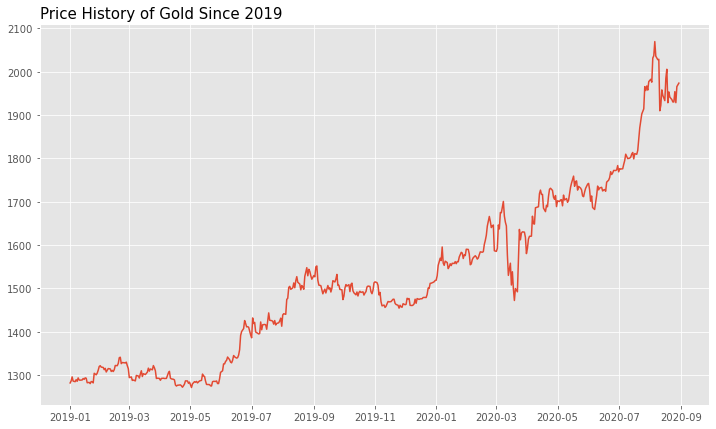

In [3]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(gold.index, gold.close)
ax.set_title("Price History of Gold Since 2019", fontsize=15, loc="left")

## 2. 利用ax.text添加文本

接口：$ax.text(x, y, s, *, color, size, ha, va, rotation, bbox, style)$

'x','y','s'是必要参数，分别定义文本的坐标和内容。其余参数是可选参数，通过关键字参数传递，这里列举了一些常用的参数。

ax.text创建mpl.text.Text对象，上面可选参数都是构造Text对象的属性，如果要深度调整Text对象的样式，参阅[官方文档](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)。

* x: 文本的x轴坐标
* y: 文本的y轴坐标
* s: 要添加的文本，长字符串可用'\n'分行
* color: 文本颜色
* size: 文本大小
* ha or horizontalalignment: 水平对齐，'center', 'right', 'left'
* va or verticalalignment: 垂直对齐，'center', 'top', 'bottom', 'baseline'
* rotation: 文本旋转角度，可以是代表角度的整数，也可以是字符串：'vertical', 'horizontal'
* bbox: 是否将文本放置于文本框内，需要提供一个定义文本框样式的字典
* style: 字体样式，'normal', 'italic', 'oblique'

Text(0.0, 1.0, 'How Fed Fund Rates Impacted Gold')

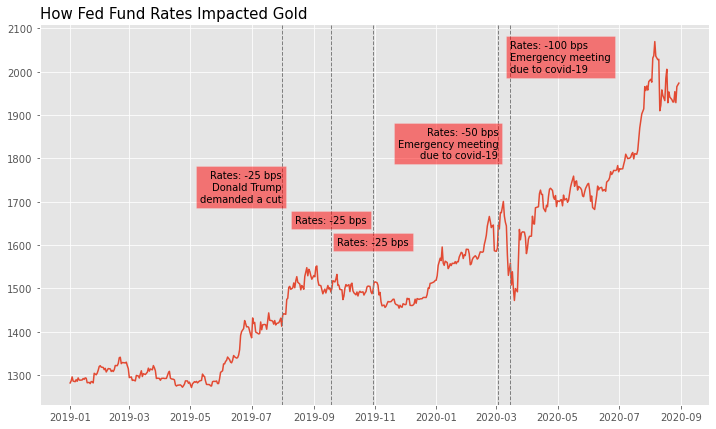

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(gold.index, gold.close)

# 创建文本框，将文本置于文本框内
bbox = {"facecolor": "red", "alpha": 0.5}

# 所有文本使用统一的样式
styles = {"size": 10, "color": "black", "bbox": bbox}

x1, y1 = dt.datetime(2019, 7, 31), 1700
text1 = "Rates: -25 bps\nDonald Trump\ndemanded a cut"
ax.axvline(x1, color="gray", linestyle="dashed", linewidth=1.0)
ax.text(x1, y1, text1, ha="right", **styles)

x2, y2 = dt.datetime(2019, 9, 18), 1650
text2 = "Rates: -25 bps"
ax.axvline(x2, color="gray", linestyle="dashed", linewidth=1.0)
ax.text(x2, y2, text2, ha="center", **styles)

x3, y3 = dt.datetime(2019, 10, 30), 1600
text3 = "Rates: -25 bps"
ax.axvline(x3, color="gray", linestyle="dashed", linewidth=1.0)
ax.text(x3, y3, text3, ha="center", **styles)

x4, y4 = dt.datetime(2020, 3, 3), 1800
text4 = "Rates: -50 bps\nEmergency meeting\ndue to covid-19"
ax.axvline(x4, color="gray", linestyle="dashed", linewidth=1.0)
ax.text(x4, y4, text4, ha="right", **styles)

x5, y5 = dt.datetime(2020, 3, 15), 2000
text5 = "Rates: -100 bps\nEmergency meeting\ndue to covid-19"
ax.axvline(x5, color="gray", linestyle="dashed", linewidth=1.0)
ax.text(x5, y5, text5, ha="left", **styles)

ax.set_title("How Fed Fund Rates Impacted Gold", loc="left", fontsize=15)

## 3. 利用ax.annotate添加文本

Matplotlib提供了一个更加强大的接口，能够同时添加文本和箭头，实现更美观的可视化效果。

接口：$ax.annotate(text, xy, xytext, xycoords, textcoords, arrowprops, **kwargs)$

理解ax.annotate的关键在于，它会创建两个点：xy和xytext，xy是标注点的坐标，xytext是文本的坐标，中间有一个箭头从xytext指向xy。在最简单的情况下，只需要提供text和xy，往图表中添加文本，效果跟ax.text相同。如果要添加箭头，则需要同时指定两个点的坐标，以及箭头的样式。

* text: 文本
* xy: 包含两个浮点值的元组，表示要标注的坐标，如果添加箭头，代表箭头指向的位置
* xytext: 包含两个浮点值的元组，表示文本的坐标，默认等于xy, 在最简单的情况下不需要定义，如果要添加箭头，则必须定义xytext并区别于xy, 箭头从坐标(xytext)指向坐标(xy)
* xycoords: xy使用的坐标系统，默认值'data'，即使用跟映射数据相同尺度的坐标体系
* textcoords: xytext使用的坐标系统，如果不使用箭头，使用默认值即可，如果要添加箭头，建议设置为'offset points'，那么xytext就表示相对xy的位移，方便我们调整文本的位置
* arrowprops: 添加箭头，需要提供一个字典
* kwargs: 传递给mpl.text.Text的关键字参数，跟ax.text类似，ax.annotate也会创建mpl.text.Text对象，关键字参数用于定义文本的样式

先看一个简单的案例。

Text(0.8, 0.8, '')

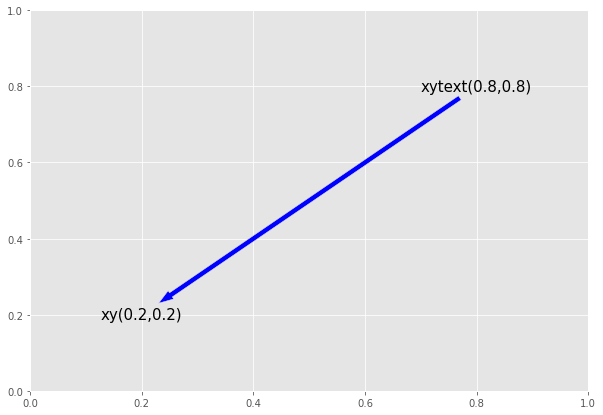

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))

styles = dict(ha="center", va="center", color="black", size=15)
ax.annotate(s="xytext(0.8,0.8)", xy=(0.8, 0.8), **styles)
ax.annotate(s="xy(0.2,0.2)", xy=(0.2, 0.2), **styles)

# 如果要创建箭头，需要提供一个字典，传递给ax.annotate的参数arrowprops
# Matplotlib会根据字典的内容创建FancyArrowPatch对象
# 如果只需要创建简单的箭头，不需要使用'arrowstyle'字段，该字段用于创建复杂箭头
# 有几个常用参数可以定制简单箭头的样式，如下所示
arrowprops = {
    "facecolor": "blue",  # 箭头颜色
    "width": 5.0,  # 箭头宽度
    "headwidth": 10.0,  # 箭头头部的宽度
    "headlength": 15.0,  # 箭头头部的长度
    "shrink": 0.05  # 箭头从两端收缩的比例，避免或文本重叠
}

ax.annotate(
    s="",
    xy=(0.2, 0.2),
    xytext=(0.8, 0.8),
    xycoords="data",
    textcoords="data",
    arrowprops=arrowprops
)

Matplotlib允许创建复杂的箭头，包括调整箭头的形状。

要实现这一点，需要往变量arrowprops中添加'arrowstyle'和'connectionstyle'字段，前者控制箭头的样式，后者控制连接的形状。

**由于arrowstyle提前定义了箭头的样式，如果要进一步调整箭头的颜色和宽度等属性，则必须使用跟上面案列不同的字段**。

关于'arrowstyle'和'connectionstyle'的细节，参阅官方文档：

* [如何使用annotate](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.annotate.html)
* [如何使用FancyArrowPatch](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)
* [如何调整箭头的连接形状](https://matplotlib.org/3.3.1/gallery/userdemo/connectionstyle_demo.html#sphx-glr-gallery-userdemo-connectionstyle-demo-py)

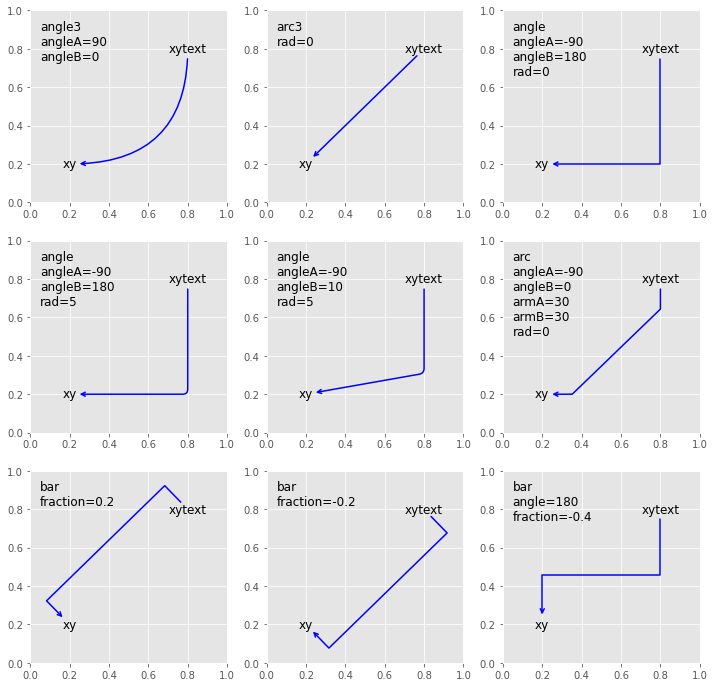

In [6]:
def plot_arrow(ax, arrowstyle, connectionstyle, **kwargs):
    styles = dict(ha="center", va="center", color="black", size=12)
    ax.annotate(s="xytext", xy=(0.8, 0.8), **styles)
    ax.annotate(s="xy", xy=(0.2, 0.2), **styles)
    
    desc = connectionstyle.replace(",", "\n")
    ax.annotate(desc, (0.05, 0.95), ha="left", va="top", size=12)
    
    arrowprops = {
        "arrowstyle": arrowstyle,
        "connectionstyle": connectionstyle
    }
    if kwargs:
        arrowprops.update(kwargs)

    ax.annotate(
        s="",
        xy=(0.2, 0.2),
        xytext=(0.8, 0.8),
        xycoords="data",
        textcoords="data",
        arrowprops=arrowprops
    )

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))
axes = axes.flatten()

# 在定义了'arrowstyle'的情况下进一步调整箭头的样式
# 注意参数和没有定义'arrowstyle'的情况下不同
styles = {
    "color": "blue",  # 箭头颜色
    "shrinkA": 10,  # 箭头从A点收缩
    "shrinkB": 10,  # 箭头从B点收缩
    "linewidth": 1.5  # 箭头大小
}

# arrowstyle有很多选择：例如'->', '<->', 'simple', 'fancy'，具体参见官方文档
# connectionstyle用于控制箭头的形状，这里列举几种常见的组合，具体参见官方文档
plot_arrow(axes[0], "->", "angle3,angleA=90,angleB=0", **styles)
plot_arrow(axes[1], "->", "arc3,rad=0", **styles)
plot_arrow(axes[2], "->", "angle,angleA=-90,angleB=180,rad=0", **styles)
plot_arrow(axes[3], "->", "angle,angleA=-90,angleB=180,rad=5", **styles)
plot_arrow(axes[4], "->", "angle,angleA=-90,angleB=10,rad=5", **styles)
plot_arrow(axes[5], "->", "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0", **styles)
plot_arrow(axes[6], "->", "bar,fraction=0.2", **styles)
plot_arrow(axes[7], "->", "bar,fraction=-0.2", **styles)
plot_arrow(axes[8], "->", "bar,angle=180,fraction=-0.4", **styles)

回到真实的案例，先添加文本，然后用不同的箭头指向对应的时间点。

Text(0.0, 1.0, 'How Fed Fund Rates Impacted Gold')

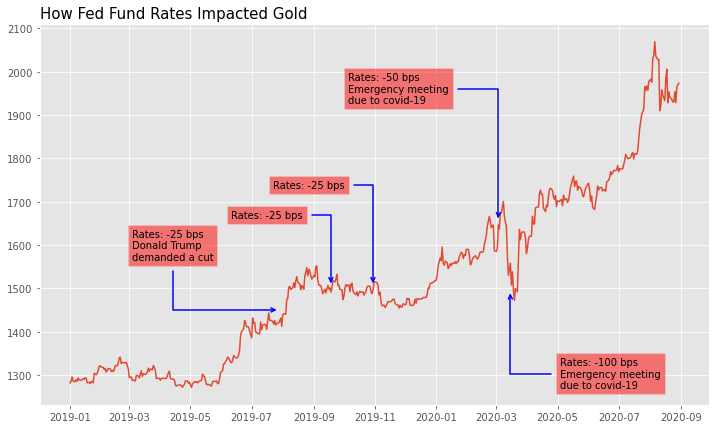

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(gold.index, gold.close)

# 文本使用统一的样式
styles = {
    "size": 10,
    "color": "black",
    "bbox": {
        "facecolor": "red",
        "alpha": 0.5
    }
}

# 箭头使用统一的样式
arrowprops = {
    "arrowstyle": "->",
    "color": "blue",
    "shrinkA": 5,
    "shrinkB": 5,
    "linewidth": 1.5
}

xy1 = dt.datetime(2019, 7, 31), 1450
s1 = "Rates: -25 bps\nDonald Trump\ndemanded a cut"
arrowprops.update({"connectionstyle": "angle,angleA=-90,angleB=180,rad=0"})
ax.annotate(
    s=s1,  # 文本
    xy=xy1,  # 箭头指向的坐标
    xytext=(-150, 50),  # 文本坐标，相对(xy)的位移
    xycoords="data",  # xy使用的坐标系统，'data'表示跟映射数据相同尺度的原始坐标系统
    textcoords="offset points",  # xytext使用的坐标系统，'offset points'表示xy的相对位移
    arrowprops=arrowprops,  # 箭头
    **styles  # 文本样式
)

xy2 = dt.datetime(2019, 9, 18), 1500
s2 = "Rates: -25 bps"
arrowprops.update({"connectionstyle": "angle,angleA=0,angleB=90,rad=0"})
ax.annotate(s=s2, xy=xy2, xytext=(-100, 70), xycoords="data", textcoords="offset points", arrowprops=arrowprops, **styles)

xy3 = dt.datetime(2019, 10, 30), 1500
s3 = "Rates: -25 bps"
arrowprops.update({"connectionstyle": "angle,angleA=0,angleB=90,rad=0"})
ax.annotate(s=s3, xy=xy3, xytext=(-100, 100), xycoords="data", textcoords="offset points", arrowprops=arrowprops, **styles)

xy4 = dt.datetime(2020, 3, 3), 1650
s4 = "Rates: -50 bps\nEmergency meeting\ndue to covid-19"
arrowprops.update({"connectionstyle": "angle,angleA=0,angleB=90,rad=0"})
ax.annotate(s=s4, xy=xy4, xytext=(-150, 120), xycoords="data", textcoords="offset points", arrowprops=arrowprops, **styles)

xy5 = dt.datetime(2020, 3, 15), 1500
s5 = "Rates: -100 bps\nEmergency meeting\ndue to covid-19"
arrowprops.update({"connectionstyle": "angle,angleA=180,angleB=90,rad=0"})
ax.annotate(s=s5, xy=xy5, xytext=(50, -100), xycoords="data", textcoords="offset points", arrowprops=arrowprops, **styles)

ax.set_title("How Fed Fund Rates Impacted Gold", loc="left", fontsize=15)